In [2]:
pip install tensorflow numpy pandas matplotlib seaborn

Dataset created and saved as 'cloud_workload_data.csv'
Episode 1/500, Total Reward: -4.189999999999998, Epsilon: 1.00
Episode 2/500, Total Reward: 20.810000000000002, Epsilon: 1.00
Episode 3/500, Total Reward: -29.189999999999998, Epsilon: 1.00
Episode 4/500, Total Reward: -4.189999999999998, Epsilon: 1.00
Episode 5/500, Total Reward: -22.189999999999998, Epsilon: 1.00
Episode 6/500, Total Reward: 5.810000000000002, Epsilon: 1.00
Episode 7/500, Total Reward: 40.81, Epsilon: 1.00
Episode 8/500, Total Reward: -25.189999999999998, Epsilon: 1.00
Episode 9/500, Total Reward: 27.810000000000002, Epsilon: 1.00
Episode 10/500, Total Reward: 44.81, Epsilon: 1.00
Episode 11/500, Total Reward: -33.19, Epsilon: 1.00
Episode 12/500, Total Reward: -21.189999999999998, Epsilon: 1.00
Episode 13/500, Total Reward: -4.189999999999998, Epsilon: 1.00
Episode 14/500, Total Reward: 16.810000000000002, Epsilon: 1.00
Episode 15/500, Total Reward: -8.189999999999998, Epsilon: 1.00
Episode 16/500, Total Reward:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Episode 316/500, Total Reward: 36.81, Epsilon: 1.00
Episode 317/500, Total Reward: -33.19, Epsilon: 1.00
Episode 318/500, Total Reward: -5.189999999999998, Epsilon: 1.00
Episode 319/500, Total Reward: -20.189999999999998, Epsilon: 1.00
Episode 320/500, Total Reward: 17.810000000000002, Epsilon: 1.00
Episode 321/500, Total Reward: 17.810000000000002, Epsilon: 1.00
Episode 322/500, Total Reward: -21.189999999999998, Epsilon: 1.00
Episode 323/500, Total Reward: -24.189999999999998, Epsilon: 1.00
Episode 324/500, Total Reward: 29.810000000000002, Epsilon: 1.00
Episode 325/500, Total Reward: -20.189999999999998, Epsilon: 1.00
Episode 326/500, Total Reward: -22.189999999999998, Epsilon: 1.00
Episode 327/500, Total Reward: -17.189999999999998, Epsilon: 1.00
Episode 328/500, Total Reward: -42.19, Epsilon: 1.00
Episode 329/500, Total Reward: -11.189999999999998, Epsilon: 1.00
Episode 330/500, Total Reward: 14.810000000000002, Epsilon: 1.00
Episode 331/500, Total Reward: -19.189999999999998, Ep

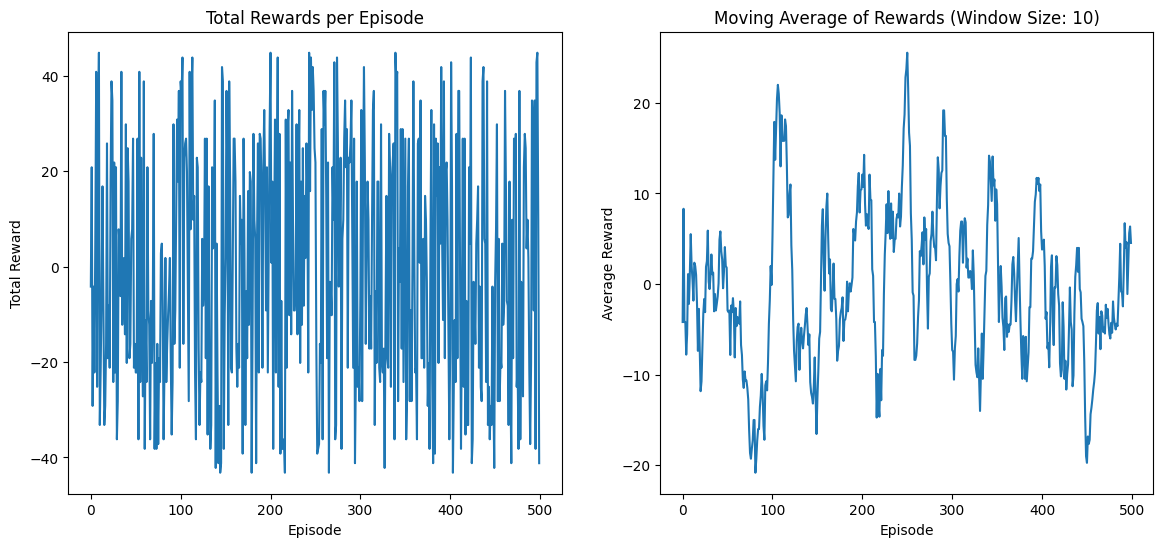

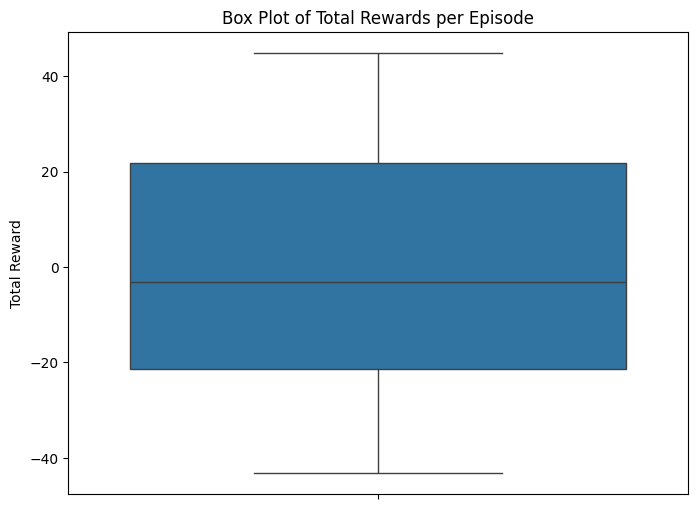


Q-values for each action based on the current policy:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
State 0: [ 5.99889969e-03  1.58203933e-02  3.40667041e-03 -2.24077795e-02
 -1.05031952e-02  1.26624797e-02  6.41531777e-03  3.39987222e-03
 -3.94879235e-03 -3.12811919e-02 -2.44943816e-02  8.75552930e-03
 -1.84526909e-02 -2.17545293e-02 -5.69131551e-03  2.36528665e-02
 -2.92239548e-03 -8.11066665e-03 -1.23060634e-03 -7.83665013e-03
 -3.83959152e-04 -7.28603220e-03 -1.46041568e-02 -2.99294908e-02
 -2.30065491e-02 -1.15764071e-03 -1.44222109e-02  5.05181961e-05
 -2.46766023e-04  2.76398975e-02 -9.14451759e-03 -8.35073460e-03
 -1.02959080e-02  2.19206512e-03  2.91072354e-02  4.98100370e-03
  1.27825262e-02 -4.11793264e-03  1.80066787e-02 -1.27779162e-02
  1.10710599e-03 -6.41468633e-03  8.89504142e-03 -8.05284455e-03
 -2.13061217e-02  5.42565389e-03  9.98587068e-03 -1.17207393e-02
 -1.93294929e-03  6.77926838e-03 -1.54244751e-02 -1.69434939e-02
 -1.43893082e-02 -2.31195055e-03 -7.70505425e-03 -1.

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
import tensorflow as tf
from tensorflow.keras import models, layers

#NumPy: Used for numerical operations, especially with matrix and Tables .
#Pandas: For data manipulation and analysis (e.g., creating and handling datasets).
#Random: To generate random numbers, which are essential for exploration in reinforcement learning.
#Matplotlib & Seaborn: Libraries for plotting graphs to visualize results.
#Collections (deque): A double-ended queue to store experiences for replay.
#TensorFlow & Keras: Frameworks for building and training neural networks.


# Step 2: Create a synthetic dataset with specified attributes
def create_synthetic_dataset(num_entries=100):
    workload_levels = ['Low', 'Medium', 'High', 'Very High', 'Critical']

    resource_allocations = np.random.randint(1, 10, size=num_entries)
    costs = np.random.randint(10, 100, size=num_entries)
    cpu_usage = np.random.uniform(0.1, 1.0, size=num_entries)
    memory_usage = np.random.uniform(0.1, 1.0, size=num_entries)
    disk_io = np.random.randint(100, 1000, size=num_entries)
    network_bandwidth = np.random.randint(10, 100, size=num_entries)
    latency = np.random.uniform(5, 200, size=num_entries)
    uptime = np.random.uniform(95, 100, size=num_entries)
    error_rate = np.random.uniform(0.0, 0.05, size=num_entries)
    region = np.random.choice(['us-east', 'us-west', 'eu-central', 'ap-south'], size=num_entries)
    instance_type = np.random.choice(['t2.micro', 't2.small', 't2.medium'], size=num_entries)
    security_level = np.random.choice(['Low', 'Medium', 'High'], size=num_entries)
    backup_status = np.random.choice(['Enabled', 'Disabled'], size=num_entries)
    scaling_policy = np.random.choice(['Auto Scaling', 'Manual Scaling'], size=num_entries)
    maintenance_window = np.random.choice(['Weekdays', 'Weekends'], size=num_entries)

    last_backup_time = pd.date_range(start='2023-01-01', periods=num_entries).to_series().sample(num_entries).dt.strftime('%Y-%m-%d')
    incident_history = np.random.randint(0, 5, size=num_entries)

    data = {
        'Workload_Level': np.random.choice(workload_levels, size=num_entries),
        'Resource_Allocation': resource_allocations,
        'Cost': costs,
        'CPU_Usage': cpu_usage,
        'Memory_Usage': memory_usage,
        'Disk_IO': disk_io,
        'Network_Bandwidth': network_bandwidth,
        'Latency': latency,
        'Uptime': uptime,
        'Error_Rate': error_rate,
        'Region': region,
        'Instance_Type': instance_type,
        'Security_Level': security_level,
        'Backup_Status': backup_status,
        'Scaling_Policy': scaling_policy,
        'Maintenance_Window': maintenance_window,
        'Last_Backup_Time': last_backup_time,
        'Incident_History': incident_history
    }

    dataset = pd.DataFrame(data)
    dataset.to_csv('cloud_workload_data.csv', index=False)
    print("Dataset created and saved as 'cloud_workload_data.csv'")

#Function Definition: This function creates a synthetic dataset with a specified number of entries (default is 100).
#Categorical Features: Randomly assign regions, instance types, security levels, backup statuses, scaling policies, and maintenance windows to simulate real-world scenarios.
#Last Backup Time: Generates random dates for the last backup.
#Incident History: Random integers representing the number of incidents that have occurred.

# DQN Agent Class

#state_size: Number of features representing the state of the environment.
#action_size: Number of possible actions (resource allocations).


class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)  # Experience replay memory
        self.gamma = 0.95  # Discount rate
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01  # Minimum exploration rate
        self.epsilon_decay_rate = 0.99  # Decay rate for exploration probability
        self.learning_rate = 0.001
#Memory: Stores past experiences for replay during training.
#Gamma: Discount factor used in calculating future rewards.
#Epsilon: Exploration rate; starts high to encourage exploration.
#Epsilon Decay Rate: Reduces exploration over time.
#Learning Rate: Determines how much to adjust weights during training.


        # Build the model with optimizer initialization
        self.model = self._build_model()

    def _build_model(self):
        model = models.Sequential()
        model.add(layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(layers.Dense(24, activation='relu'))
        model.add(layers.Dense(self.action_size, activation='linear'))
#Adam Optimizer

# Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent.
# The method is really efficient when working with large problem involving a lot of data or parameters.
#It requires less memory and is efficient.
#Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.

        # Adam optimizer initialization using learning_rate
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))

        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
#The remember method stores experiences (state transitions) in the agent's memory.
# This is essential for the experience replay mechanism used in DQNs.
#state: The current state of the environment before taking an action.
#action: The action taken by the agent in that state.
#reward: The reward received after taking the action.
#next_state: The new state of the environment after the action is taken.
#done: A boolean flag indicating whether the episode has ended (i.e., whether the agent reached a terminal state).

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explore action space
        act_values = self.model.predict(state)  # Exploit learned values
        return np.argmax(act_values[0])
#The act method determines which action the agent should take given its current state.
#It implements an epsilon-greedy strategy for balancing exploration and exploitation.

#Epsilon-Greedy Strategy:
#The agent generates a random number between 0 and 1 using np.random.rand().
#If this number is less than or equal to self.epsilon, it chooses a random action
#from the available actions (random.randrange(self.action_size)).
#This promotes exploration of new actions.
#If not, it predicts Q-values for all possible actions using its model (self.model.predict(state)),
# and selects the action with the highest Q-value (np.argmax(act_values)).
#This promotes exploitation of known good actions.

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)

        for state, action, reward, next_state, done in minibatch:
            target = reward

            if not done:
                target += self.gamma * np.amax(self.model.predict(next_state)[0])

            target_f = self.model.predict(state)
            target_f[0][action] = target

            self.model.fit(state, target_f, epochs=1, verbose=0)

            if self.epsilon > self.epsilon_min:
                # Adjust epsilon decay to be more aggressive.
                self.epsilon *= self.epsilon_decay_rate
# Purpose we used the Decay method
#The replay method allows the agent to learn from its past experiences
# by sampling a batch of experiences from memory and updating its model accordingly.


# THE COMPLETE FUNCTIONALITY OF THE
#Check Memory Size:
#If there are not enough experiences in memory (len(self.memory) < batch_size),
#it returns early without performing any updates.

#Sample Mini-Batch:
#Randomly samples a mini-batch of experiences from memory using random.sample(self.memory, batch_size).

# formula behind the complete execution of the Resources
#                     target+=γ⋅max_a′Q(s′,a′) ----------- BELLMAN EQUATION


#target: This represents the target Q-value that we want to update based on
#the reward received and the estimated future rewards.

#γ: This is the discount factor, a hyperparameter that determines the importance of future rewards compared to
#immediate rewards.
#It typically ranges between 0 and 1:

#A value close to 0 makes the agent prioritize immediate rewards.
#A value close to 1 encourages the agent to consider long-term rewards.

#maxa′= Q(s′,a′): This term represents the maximum expected future reward obtainable from the next state s′
# by taking any action a′
#. It essentially captures the best possible outcome from the next state.







#Update Q-values:
#For each experience (state, action, reward, next_state, done) in the mini-batch:
#Initialize target with the immediate reward received.
#If the episode is not done (if not done:), calculate the expected future reward using Bellman’s equation:
#target

#Here, γ (self.gamma) is the discount factor that weighs future rewards.
#This equation updates target to include both immediate and future rewards.

#Predict current Q-values for the given state using self.model.predict(state)
#and update the Q-value for the taken action with the calculated target value (target_f[action] = target).


#Model Training:
#Fit the model on this updated target Q-values using self.model.fit(state, target_f, epochs=1, verbose=0).
# This updates the neural network weights based on how well it predicts Q-values for actions taken in past states.


#Epsilon Decay:
#If epsilon is greater than its minimum value (self.epsilon > self.epsilon_min),
# it reduces epsilon by multiplying it by self.epsilon_decay_rate.
#This encourages more exploitation over time as learning progresses.


def plot_box_plot(rewards):
   plt.figure(figsize=(8,6))
   sns.boxplot(data=rewards)
   plt.title('Box Plot of Total Rewards per Episode')
   plt.ylabel('Total Reward')
   plt.show()

def display_q_values(agent):
   print("\nQ-values for each action based on the current policy:")
   for state_index in range(agent.state_size):
       state_vector = np.zeros((1, agent.state_size))
       state_vector[0][state_index] = 1
       q_values = agent.model.predict(state_vector)[0]
       print(f"State {state_index}: {q_values}")

def main():
    create_synthetic_dataset()

    dataset = pd.read_csv('cloud_workload_data.csv')

    states_count = len(dataset) \
    actions_count = len(dataset['Resource_Allocation'])

    costs = dataset['Cost'].values
    agent = DQNAgent(state_size=states_count + actions_count + 1 , action_size=actions_count)

    episodes = 500  #  number of training episodes
    batch_size = 32

    # Define a baseline cost (e.g., mean cost)
    baseline_cost = np.mean(costs)

    total_rewards_per_episode = []  # To store total rewards per episode

    for e in range(episodes):
        state_index = random.randint(0, states_count - 1)

        total_reward = 0

        for time in range(50):
            state_vector = np.zeros((1, states_count + actions_count + 1))
            state_vector[0][state_index] = 1

            action_index = agent.act(state_vector)

            next_state_index = (state_index + action_index) % states_count

            # Calculate reward based on how much lower the cost is compared to the baseline
            current_cost = costs[state_index]
            next_cost = costs[next_state_index]

            # Reward is positive if next cost is lower than current cost
            if next_cost < current_cost:
                reward = baseline_cost - next_cost  # Positive reward for lower cost
            else:
                reward = -(next_cost - baseline_cost)  # Negative reward for higher cost

            total_reward += reward

            next_state_vector = np.zeros((1, states_count + actions_count + 1))
            next_state_vector[0][next_state_index] = 1

            done = True

            agent.remember(state_vector, action_index, reward, next_state_vector, done)

            state_index = next_state_index

            if done:
                break

            agent.replay(batch_size)

        total_rewards_per_episode.append(total_reward)  # Store total reward for this episode

        print(f"Episode {e+1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

    # Plotting performance metrics and box plot of rewards
    plt.figure(figsize=(14,6))

    # Plot total rewards per episode
    plt.subplot(1, 2, 1)
    plt.plot(total_rewards_per_episode)
    plt.title('Total Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

    # Calculate and plot moving average of rewards for smoother visualization
    window_size = 10
    moving_avg_rewards = [np.mean(total_rewards_per_episode[max(0,i-window_size):i+1]) for i in range(len(total_rewards_per_episode))]

    plt.subplot(1, 2, 2)
    plt.plot(moving_avg_rewards)
    plt.title(f'Moving Average of Rewards (Window Size: {window_size})')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')

   # Call box plot and Q-values display functions here
    plot_box_plot(total_rewards_per_episode)
    display_q_values(agent)

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
   main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dataset created and saved as 'cloud_workload_data.csv'
Episode 1/500, Total Reward: 12.64, Epsilon: 1.00
Episode 2/500, Total Reward: -29.36, Epsilon: 1.00
Episode 3/500, Total Reward: 21.64, Epsilon: 1.00
Episode 4/500, Total Reward: 39.64, Epsilon: 1.00
Episode 5/500, Total Reward: 11.64, Epsilon: 1.00
Episode 6/500, Total Reward: 7.640000000000001, Epsilon: 1.00
Episode 7/500, Total Reward: 33.64, Epsilon: 1.00
Episode 8/500, Total Reward: 39.64, Epsilon: 1.00
Episode 9/500, Total Reward: 4.640000000000001, Epsilon: 1.00
Episode 10/500, Total Reward: -45.36, Epsilon: 1.00
Episode 11/500, Total Reward: 34.64, Epsilon: 1.00
Episode 12/500, Total Reward: -28.36, Epsilon: 1.00
Episode 13/500, Total Reward: -3.3599999999999994, Epsilon: 1.00
Episode 14/500, Total Reward: 38.64, Epsilon: 1.00
Episode 15/500, Total Reward: -3.3599999999999994, Epsilon: 1.00
Episode 16/500, Total Reward: 35.64, Epsilon: 1.00
Episode 17/500, Total Reward: -44.36, Epsilon: 1.00
Episode 18/500, Total Reward: 2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


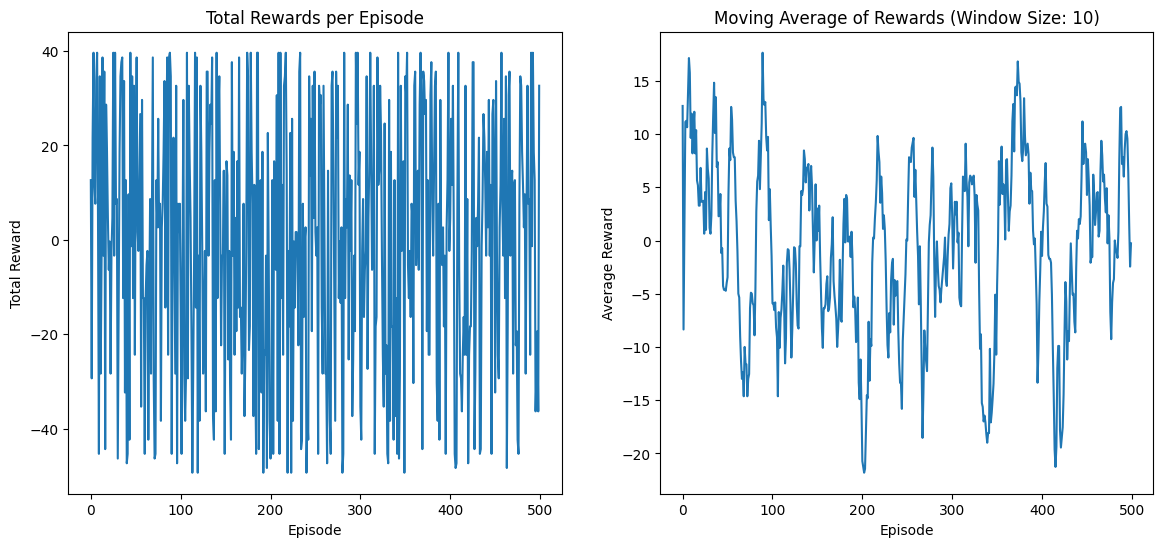

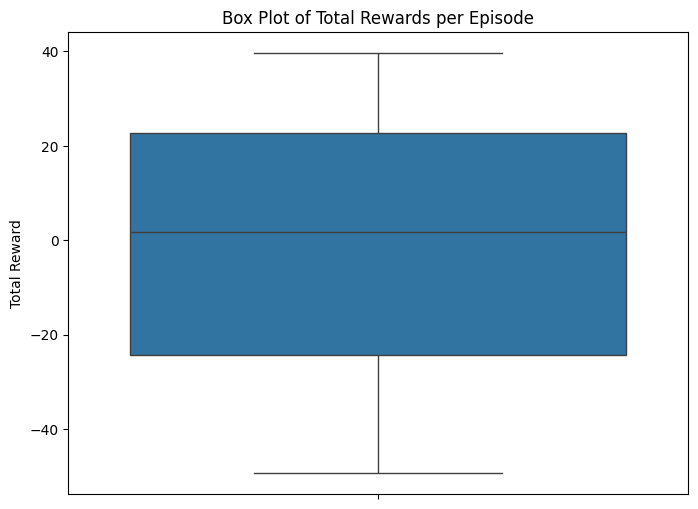


Q-values for each action based on the current policy:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
State 0: [-0.02522948 -0.02764842 -0.01483876 -0.01668415 -0.00414868 -0.03842932
 -0.00314833  0.00843467  0.03421329  0.0325697   0.03376329  0.00016878
 -0.03102635 -0.00481367 -0.01158112 -0.02014548  0.03450056 -0.03739719
  0.0292603   0.01742903  0.040104   -0.0159499  -0.01230432  0.01984945
  0.0127175   0.01557155 -0.00074702  0.04265725  0.00186083  0.03201996
  0.02160465 -0.00113909 -0.00555474  0.01904799 -0.02191809  0.03206178
 -0.03774953 -0.00616794 -0.01335432 -0.00687607  0.0254255  -0.00344068
  0.01722539  0.02183618 -0.00700535  0.00752973 -0.00359271 -0.00244446
 -0.03279171  0.03943821  0.01354036 -0.02304365  0.01777835 -0.0118519
 -0.01259183  0.03133838  0.04707101 -0.0521569   0.0006917  -0.01582499
 -0.01522083  0.03549005 -0.03836574  0.01175345 -0.00809563 -0.01464053
 -0.01266729 -0.02375251 -0.00394953  0.01856471  0.00901408  0.00585607
 -0.00799535  0.0064927

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
import tensorflow as tf
from tensorflow.keras import models, layers

# Step 2: Create a synthetic dataset with specified attributes
def create_synthetic_dataset(num_entries=100):
    workload_levels = ['Low', 'Medium', 'High', 'Very High', 'Critical']

    resource_allocations = np.random.randint(1, 10, size=num_entries)
    costs = np.random.randint(10, 100, size=num_entries)
    cpu_usage = np.random.uniform(0.1, 1.0, size=num_entries)
    memory_usage = np.random.uniform(0.1, 1.0, size=num_entries)
    disk_io = np.random.randint(100, 1000, size=num_entries)
    network_bandwidth = np.random.randint(10, 100, size=num_entries)
    latency = np.random.uniform(5, 200, size=num_entries)
    uptime = np.random.uniform(95, 100, size=num_entries)
    error_rate = np.random.uniform(0.0, 0.05, size=num_entries)
    region = np.random.choice(['us-east', 'us-west', 'eu-central', 'ap-south'], size=num_entries)
    instance_type = np.random.choice(['t2.micro', 't2.small', 't2.medium'], size=num_entries)
    security_level = np.random.choice(['Low', 'Medium', 'High'], size=num_entries)
    backup_status = np.random.choice(['Enabled', 'Disabled'], size=num_entries)
    scaling_policy = np.random.choice(['Auto Scaling', 'Manual Scaling'], size=num_entries)
    maintenance_window = np.random.choice(['Weekdays', 'Weekends'], size=num_entries)

    last_backup_time = pd.date_range(start='2023-01-01', periods=num_entries).to_series().sample(num_entries).dt.strftime('%Y-%m-%d')
    incident_history = np.random.randint(0, 5, size=num_entries)

    data = {
        'Workload_Level': np.random.choice(workload_levels, size=num_entries),
        'Resource_Allocation': resource_allocations,
        'Cost': costs,
        'CPU_Usage': cpu_usage,
        'Memory_Usage': memory_usage,
        'Disk_IO': disk_io,
        'Network_Bandwidth': network_bandwidth,
        'Latency': latency,
        'Uptime': uptime,
        'Error_Rate': error_rate,
        'Region': region,
        'Instance_Type': instance_type,
        'Security_Level': security_level,
        'Backup_Status': backup_status,
        'Scaling_Policy': scaling_policy,
        'Maintenance_Window': maintenance_window,
        'Last_Backup_Time': last_backup_time,
        'Incident_History': incident_history
    }

    dataset = pd.DataFrame(data)
    dataset.to_csv('cloud_workload_data.csv', index=False)
    print("Dataset created and saved as 'cloud_workload_data.csv'")

# DQN Agent Class
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)  # Experience replay memory
        self.gamma = 0.95  # Discount rate
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01  # Minimum exploration rate
        self.epsilon_decay_rate = 0.99  # Decay rate for exploration probability
        self.learning_rate = 0.001

        # Build the model with corrected optimizer initialization
        self.model = self._build_model()

    def _build_model(self):
        model = models.Sequential()
        model.add(layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(layers.Dense(24, activation='relu'))
        model.add(layers.Dense(self.action_size, activation='linear'))

        # Corrected line for Adam optimizer initialization using learning_rate instead of lr
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))

        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explore action space
        act_values = self.model.predict(state)  # Exploit learned values
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)

        for state, action, reward, next_state, done in minibatch:
            target = reward

            if not done:
                target += self.gamma * np.amax(self.model.predict(next_state)[0])

            target_f = self.model.predict(state)
            target_f[0][action] = target

            self.model.fit(state, target_f, epochs=1, verbose=0)

            if self.epsilon > self.epsilon_min:
                # Adjust epsilon decay to be more aggressive.
                self.epsilon *= self.epsilon_decay_rate

def plot_box_plot(rewards):
   plt.figure(figsize=(8,6))
   sns.boxplot(data=rewards)
   plt.title('Box Plot of Total Rewards per Episode')
   plt.ylabel('Total Reward')
   plt.show()

def display_q_values(agent):
   print("\nQ-values for each action based on the current policy:")
   for state_index in range(agent.state_size):
       state_vector = np.zeros((1, agent.state_size))
       state_vector[0][state_index] = 1
       q_values = agent.model.predict(state_vector)[0]
       print(f"State {state_index}: {q_values}")

def main():
    create_synthetic_dataset()

    dataset = pd.read_csv('cloud_workload_data.csv')

    states_count = len(dataset)
    actions_count = len(dataset['Resource_Allocation'])

    costs = dataset['Cost'].values
    agent = DQNAgent(state_size=states_count + actions_count + 1 , action_size=actions_count)

    episodes = 500
    batch_size = 32

    baseline_cost = np.mean(costs)

    total_rewards_per_episode = []

    for e in range(episodes):
        state_index = random.randint(0, states_count - 1)

        total_reward = 0

        for time in range(50):
            state_vector = np.zeros((1, states_count + actions_count + 1))
            state_vector[0][state_index] = 1

            action_index = agent.act(state_vector)

            next_state_index = (state_index + action_index) % states_count

            current_cost = costs[state_index]
            next_cost = costs[next_state_index]

            # Reward is positive if next cost is lower than current cost
            if next_cost < current_cost:
                reward = baseline_cost - next_cost
            else:
                reward = -(next_cost - baseline_cost)

            total_reward += reward

            next_state_vector = np.zeros((1, states_count + actions_count + 1))
            next_state_vector[0][next_state_index] = 1

            done = True

            agent.remember(state_vector, action_index, reward, next_state_vector, done)

            state_index = next_state_index

            if done:
                break

            agent.replay(batch_size)

        total_rewards_per_episode.append(total_reward)

        print(f"Episode {e+1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

    plt.figure(figsize=(14,6))

    plt.subplot(1, 2, 1)
    plt.plot(total_rewards_per_episode)
    plt.title('Total Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

    window_size = 10
    moving_avg_rewards = [np.mean(total_rewards_per_episode[max(0,i-window_size):i+1]) for i in range(len(total_rewards_per_episode))]

    plt.subplot(1, 2, 2)
    plt.plot(moving_avg_rewards)
    plt.title(f'Moving Average of Rewards (Window Size: {window_size})')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')

   # Call box plot and Q-values display functions here
    plot_box_plot(total_rewards_per_episode)
    display_q_values(agent)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
   main()
